In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('stats_df.csv')

In [3]:
df.shape

(97, 10)

In [4]:
df.head()

,Country,Year,goals_z,xg_z,boxtouches_z,progpasses_z,progruns_z,new_xg,Fouled,results
0,Germany,2010,0.816923,0.513077,0.458462,-0.367692,0.142308,1.030100,0.160000,3
1,Germany,2014,0.755385,0.719231,0.601538,0.316154,0.198462,1.650710,0.163846,1
2,Germany,2018,-0.066154,0.615385,1.570000,0.565385,0.930769,-30.732480,0.520000,32
3,Germany,2006,0.560000,0.482308,0.450769,0.300769,0.272308,1.487637,1.487637,3
4,Germany,2002,0.563077,0.426923,0.280769,-0.102308,0.011538,1.668033,0.053847,2


In [5]:
df.corr()

,Year,goals_z,xg_z,boxtouches_z,progpasses_z,progruns_z,new_xg,Fouled,results
Year,1.000000,0.001044,0.082374,0.141479,0.119576,0.094472,0.001533,0.000007,-0.019075
goals_z,0.001044,1.000000,0.541266,0.194930,0.092259,0.198473,0.074027,0.192601,-0.677697
xg_z,0.082374,0.541266,1.000000,0.670118,0.126050,0.415566,-0.025007,0.231998,-0.341385
boxtouches_z,0.141479,0.194930,0.670118,1.000000,0.258612,0.493894,-0.064423,0.259746,-0.157318
progpasses_z,0.119576,0.092259,0.126050,0.258612,1.000000,0.427206,-0.012886,0.072928,0.056201
progruns_z,0.094472,0.198473,0.415566,0.493894,0.427206,1.000000,0.005968,0.326383,-0.191499
new_xg,0.001533,0.074027,-0.025007,-0.064423,-0.012886,0.005968,1.000000,-0.032809,0.011336
Fouled,0.000007,0.192601,0.231998,0.259746,0.072928,0.326383,-0.032809,1.000000,-0.220646
results,-0.019075,-0.677697,-0.341385,-0.157318,0.056201,-0.191499,0.011336,-0.220646,1.000000


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,97.0,2010.371134,5.804667,2002.000000,2006.000000,2010.000000,2014.000000,2018.000000
goals_z,97.0,0.164599,0.281354,-0.410000,-0.044615,0.133077,0.376923,0.881538
xg_z,97.0,0.250000,0.266517,-0.292308,0.076154,0.218462,0.442308,1.015385
boxtouches_z,97.0,0.262419,0.315725,-0.313077,0.050000,0.203077,0.444615,1.570000
progpasses_z,97.0,-0.020603,0.240030,-0.463846,-0.201538,-0.030000,0.130769,0.666923
progruns_z,97.0,0.188176,0.386885,-0.499231,-0.051538,0.121538,0.416154,1.432308
new_xg,97.0,-11.010630,109.760577,-1078.323790,-0.135497,1.110948,2.530546,27.801178
Fouled,97.0,0.016105,0.396966,-0.900769,-0.266100,0.051539,0.230000,1.487637
results,97.0,19.628866,11.914032,1.000000,8.000000,16.000000,32.000000,32.000000


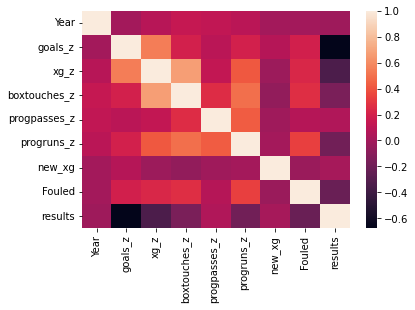

In [7]:
sns.heatmap(df.corr());

/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_14367/2528632801.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


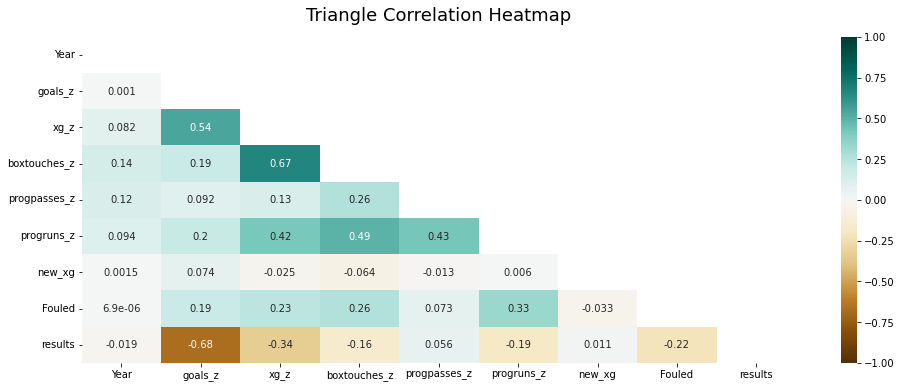

In [8]:
plt.figure(figsize=(16, 6))

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

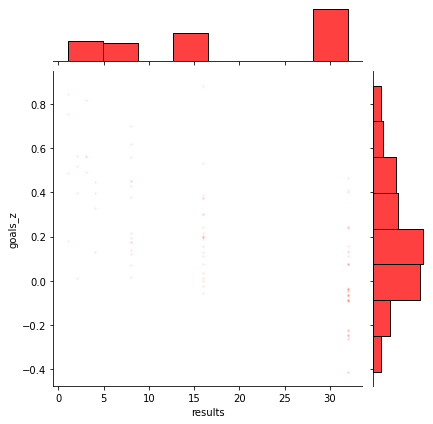

In [9]:
sns.jointplot(x=df['results'],y=df['goals_z'],
              joint_kws={'alpha':0.1,'s':5,'color':'red'},
              marginal_kws={'color':'red'})

In [10]:
y = df['results']


In [11]:
X = df.drop(columns=['results'])

In [12]:
X.head()

,Country,Year,goals_z,xg_z,boxtouches_z,progpasses_z,progruns_z,new_xg,Fouled
0,Germany,2010,0.816923,0.513077,0.458462,-0.367692,0.142308,1.030100,0.160000
1,Germany,2014,0.755385,0.719231,0.601538,0.316154,0.198462,1.650710,0.163846
2,Germany,2018,-0.066154,0.615385,1.570000,0.565385,0.930769,-30.732480,0.520000
3,Germany,2006,0.560000,0.482308,0.450769,0.300769,0.272308,1.487637,1.487637
4,Germany,2002,0.563077,0.426923,0.280769,-0.102308,0.011538,1.668033,0.053847


In [13]:
# import seaborn as sns
# sns.boxplot(x=df['goals_z'])

In [14]:
import matplotlib.pyplot as plt


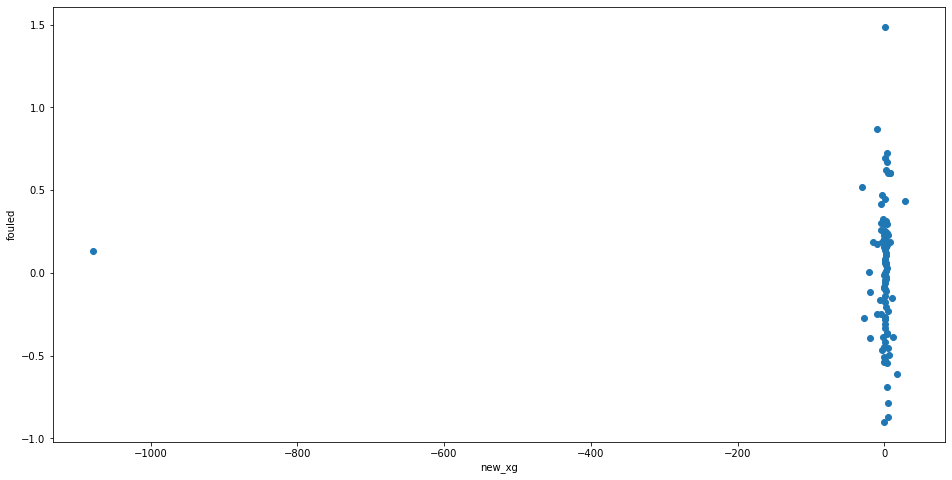

In [15]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['new_xg'], df['Fouled'])
ax.set_xlabel('new_xg')
ax.set_ylabel('fouled')
plt.show()

In [16]:
from scipy import stats
import numpy as np


In [17]:
X = X.drop(columns=['Country'])


In [18]:
z = np.abs(stats.zscore(X))
print(z)

        Year   goals_z      xg_z  boxtouches_z  progpasses_z  progruns_z  \
0   0.064269  2.330561  0.992220      0.624156      1.453539    0.119173   
1   0.628411  2.110704  1.769749      1.079677      1.410268    0.026725   
2   1.321092  0.824415  1.378084      4.163037      2.453997    1.929388   
3   0.756950  1.412650  0.876171      0.599664      1.345839    0.218590   
4   1.449630  1.423644  0.667282      0.058423      0.342165    0.458937   
..       ...       ...       ...           ...           ...         ...   
92  0.628411  0.884990  0.440986      0.807834      0.672571    0.396978   
93  1.321092  1.269742  0.487407      0.359659      0.398752    0.200602   
94  0.756950  0.714486  0.809441      0.104957      0.147485    1.279844   
95  1.449630  0.893122  1.099563      0.198019      1.308578    1.286355   
96  1.321092  1.456509  0.939998      0.450980      1.286027    0.390984   

      new_xg    Fouled  
0   0.110270  0.364370  
1   0.115953  0.374109  
2   0.180614

In [19]:
threshold = 2
print(np.where(z > 2))

(array([ 0,  1,  2,  2,  3,  9, 11, 12, 12, 15, 24, 24, 24, 26, 34, 52, 52,
       57, 57, 59, 61, 68, 69, 73, 76, 85, 96]), array([1, 1, 3, 4, 7, 5, 5, 1, 2, 4, 2, 3, 5, 1, 6, 2, 4, 4, 5, 3, 1, 7,
       7, 4, 7, 1, 7]))


In [20]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year             8.000000
goals_z          0.421538
xg_z             0.366154
boxtouches_z     0.394615
progpasses_z     0.332307
progruns_z       0.467692
new_xg           2.666043
Fouled           0.496100
results         24.000000
dtype: float64


In [21]:
print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

    Country  Fouled   Year  boxtouches_z  goals_z  new_xg  progpasses_z  \
0     False   False  False         False    False   False         False   
1     False   False  False         False    False   False         False   
2     False   False  False         False    False    True         False   
3     False   False  False         False    False   False         False   
4     False   False  False         False    False   False         False   
..      ...     ...    ...           ...      ...     ...           ...   
92    False   False  False         False    False   False         False   
93    False   False  False         False    False   False         False   
94    False   False  False         False    False    True         False   
95    False   False  False         False    False   False         False   
96    False   False  False         False    False   False         False   

    progruns_z  results   xg_z  
0        False    False  False  
1        False    False  False  


/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_14367/573165499.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))
/var/folders/j_/555m2zps099832fjh_m8jjnc0000gn/T/ipykernel_14367/573165499.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))


TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [22]:
df_no_year = df.drop(columns=['Year'])

In [23]:
df_z = df[(z < 3).all(axis=1)]

In [24]:
df_z.shape

(93, 10)

In [25]:
df_no_year.shape

(97, 9)

In [26]:
df_no_year['results'].value_counts()

32    43
16    23
8     15
3      4
1      4
2      4
4      4
Name: results, dtype: int64

In [27]:
df_z = df_no_year[(z < 3).all(axis=1)]

In [28]:
df_z.shape

(93, 9)

In [29]:
df_z['results'].value_counts()



32    42
16    22
8     15
2      4
4      4
3      3
1      3
Name: results, dtype: int64

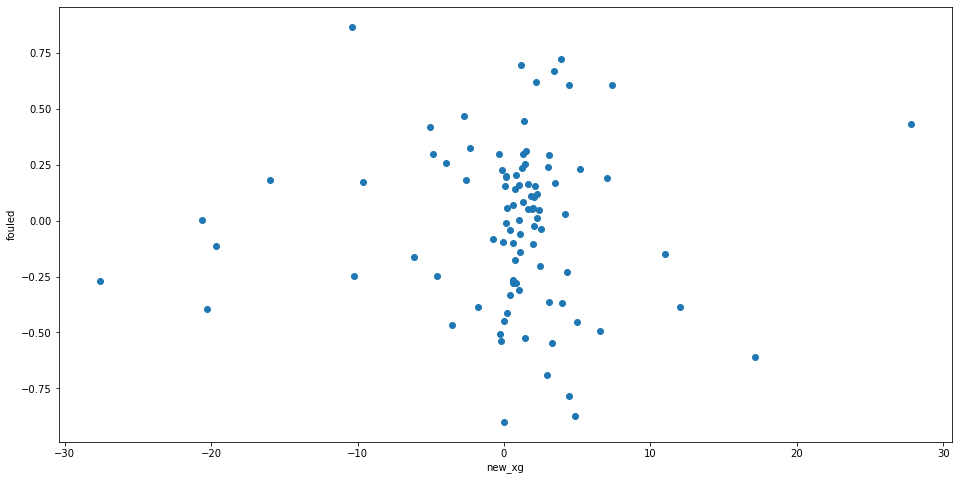

In [30]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_z['new_xg'], df_z['Fouled'])
ax.set_xlabel('new_xg')
ax.set_ylabel('fouled')
plt.show()

## Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
y = df_z['results']

In [33]:
X = df_z.drop(columns=['results', 'Country'])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.20, random_state=42)

In [35]:
reg = LinearRegression().fit(X_train, y_train)

In [36]:
predictions = reg.predict(X_test)

In [37]:
#Finding the r2 score and root mean squared error
from sklearn.metrics import r2_score, mean_squared_error
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.3033395682454376
RMSE : 9.200702505297361


## 30% - 54%

####  Permutation importance is the first tool for understanding a machine-learning model, and involves shuffling individual variables in the validation data (after a model has been fit), and seeing the effect on accuracy.


In [38]:
# import sys
# sys.path

/Users/ryantalbot/opt/anaconda3/envs/tf2/bin/python -m pip install eli5 

In [39]:
import eli5
from eli5.sklearn import PermutationImportance

In [40]:
perm = PermutationImportance(reg, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())
#Top 3 important features are Potential, Age & Reactions 

Weight,Feature
0.9400 ± 0.5700,goals_z
0.1071 ± 0.1646,xg_z
0.1021 ± 0.0729,progpasses_z
0.0417 ± 0.0637,boxtouches_z
0.0062 ± 0.0129,Fouled
-0.0003 ± 0.2712,new_xg
-0.0745 ± 0.0714,progruns_z


In [41]:
# #Visualising the results
# plt.figure(figsize=(18,10))
# sns.regplot(predictions,y_test,scatter_kws={'color':'red','edgecolor':'blue','linewidth':'0.7'},line_kws={'color':'black','alpha':0.5})
# plt.xlabel('Predictions')
# plt.ylabel('Overall')
# plt.title("Linear Prediction of Player Rating")
# plt.show()


In [42]:
# r_sq = reg.score(X_train, y_train)

In [43]:
# print(f"coefficient of determination: {r_sq}")

In [44]:
# reg.coef_

In [45]:
# print(f"slope: {reg.coef_}")

In [46]:
# reg.intercept_

In [47]:
# print(f"intercept: {reg.intercept_}")

In [48]:
# y_pred = reg.predict(X_test)

In [49]:
# print(f"predicted response:\n{y_pred}")

In [50]:
# y_pred = reg.intercept_ + np.sum(reg.coef_ * X, axis=1)

In [51]:
# print(f"predicted response:\n{y_pred}")

## Ridge Regression

In [52]:
from sklearn.linear_model import Ridge

In [53]:
clf = Ridge(alpha=1.0)

In [54]:
clf.fit(X_train, y_train)

Ridge()

In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [56]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)

print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

8.179221033430865
0.5272127371059189


#### 47% - 55% accuracy

In [57]:
pred_test_rr= rr.predict(X_test)

print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

9.202032907006087
0.30313808249200136


### 30% - 67% accuracy

## Lasso Regression

In [58]:
from sklearn import linear_model


In [59]:
clf = linear_model.Lasso(alpha=0.1)

In [60]:
clf.fit(X, y)

Lasso(alpha=0.1)

In [61]:
print(clf.coef_)

[-26.05855724   0.22007502  -0.           5.66301809  -1.27229983
  -0.22939659  -1.02714442]


In [62]:
print(clf.intercept_)

24.617690182498546


In [63]:
model_lasso = linear_model.Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)

print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))


pred_test_lasso= model_lasso.predict(X_test)

print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

8.180715960971998
0.5270398973483591
9.202020121639302
0.30314001893998277


## 47% - 55%
## 30% - 67%

## Elastic Net

In [64]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [65]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

In [66]:
model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)

In [67]:
model.fit(X_train, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.9, random_state=42, selection='random')

In [68]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [69]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

In [70]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 6.718935234819362
MSE: 94.37705167945023
RMSE: 9.7147852101552
R2 Square 0.22331382719460313
__________________________________
Train set evaluation:
_____________________________________
MAE: 6.758437899168325
MSE: 70.6706065309922
RMSE: 8.406581144019976
R2 Square 0.5005630182553513
__________________________________


## Test 22% -  67%
## Train 44% - 55%

In [71]:
regr = ElasticNet(random_state=0)

In [72]:
regr.fit(X, y)

ElasticNet(random_state=0)

In [73]:
print(regr.coef_)

[-2.70608061 -0.62810838 -0.04877745  0.         -0.2054669  -0.39701564
 -0.29377042]


In [74]:
print(regr.intercept_)

20.68947259584599


In [75]:
# print(regr.predict([[0, 0]]))

# ? SGDRegressor

In [76]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [80]:
from sklearn import linear_model

clf = linear_model.SGDRegressor()
clf.fit(X_train, y_train)

# clf is a trained model

y_predicted = clf.predict(X_test)

In [81]:
y_predicted

array([19.01116606, 11.5131218 , 14.68974899, 18.59034216, 11.79875681,
       20.81110786, 31.3502202 , 38.50971552, 14.96008459, 22.83260373,
       26.18678348, 14.31111005, 34.39813988, 23.08400787, 12.64727078,
       15.93456603, 10.86573214, 20.53556394, 44.30210453])

In [77]:
reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))

In [78]:
reg.fit(X, y)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

## RANSAC (RANdom SAmple Consensus) algorithm

In [ ]:
from sklearn.linear_model import RANSACRegressor
from sklearn.datasets import make_regression

In [ ]:
reg = RANSACRegressor(random_state=0).fit(X, y)

In [ ]:
reg.score(X, y)

In [ ]:
# reg.predict(X[:1,])

## TheilSenRegressor

In [ ]:
from sklearn.linear_model import TheilSenRegressor
from sklearn.datasets import make_regression

In [ ]:
reg = TheilSenRegressor(random_state=0).fit(X, y)

In [ ]:
reg.score(X, y)

In [ ]:
# reg.predict(X[:1,])

## ElasticNetCV

In [ ]:
from sklearn.linear_model import ElasticNetCV
from sklearn.datasets import make_regression

In [ ]:
regr = ElasticNetCV(cv=5, random_state=0)

In [ ]:
regr.fit(X, y)

In [ ]:
print(regr.alpha_)

In [ ]:
print(regr.intercept_)

In [ ]:
# print(regr.predict([[0, 0]]))

In [ ]:
df

## 2022 Teams

In [ ]:
group_16 = [('Netherlands', 'Wales'),
            ('Argentina', 'Denmark'),
            ('Spain', 'Croatia'),
            ('Brazil', 'Uruguay'),
            ('Spain', 'Russia'),
            ('France', 'Mexico'),
            ('England', 'Germany'),
            ('Portugal', 'Switzerland')]

In [ ]:
ger2020 = ['goals': 2.7]